In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

from invisible_cities.core.fit_functions import fit
from invisible_cities.core.fit_functions import polynom

from CCfun import load_pwr_file
from CCfun import load_pwr_files
from CCfun import load_spectral_radiance
from CCfun import cos

In [2]:
%matplotlib inline

plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams[  "font.size"   ] = 15

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
path = "/Users/Gonzalo/github/CCdata/pwr/"

In [5]:
spectral_radiance = load_spectral_radiance()

# Measurement of the power at sample site as a function of wavelength and polarization

In [6]:
filenames = os.path.join(path, "*sample*pol*.txt")
filenames = sorted(glob.glob(filenames))

polarizations            = np.arange  (0, 100, 10)
pol_range                = np.linspace(0, 90, 101)
wls, means, stds, ratios = load_pwr_files(filenames)

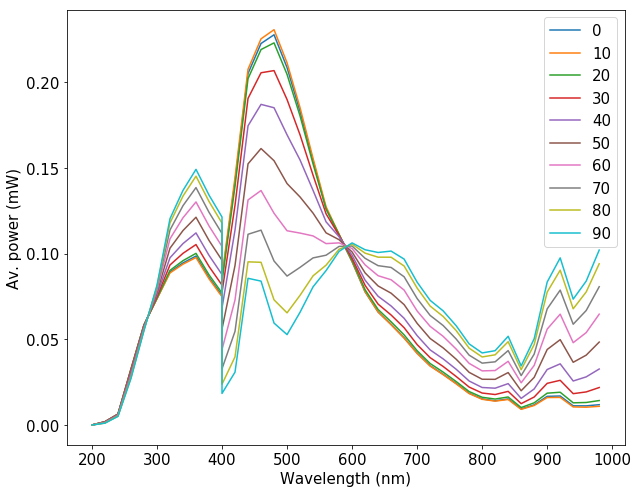

In [7]:
for pol, mean in zip(polarizations, means):
    plt.plot(wls, mean, label=str(pol))

plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Av. power (mW)");

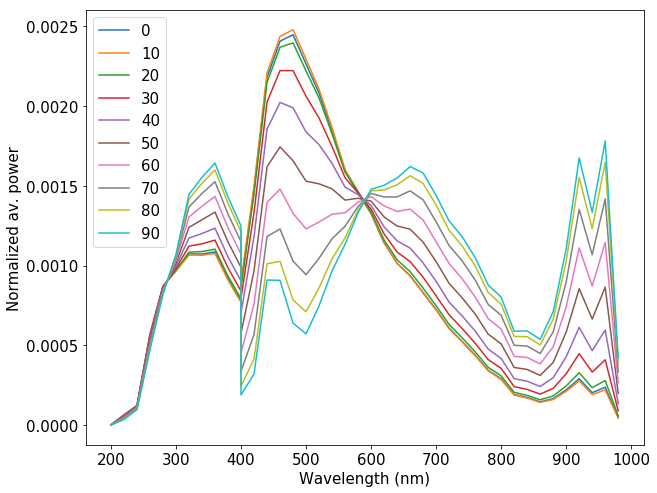

In [8]:
for pol, mean in zip(polarizations, means):
    plt.plot(wls, mean / spectral_radiance(wls), label=str(pol))

plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Normalized av. power");

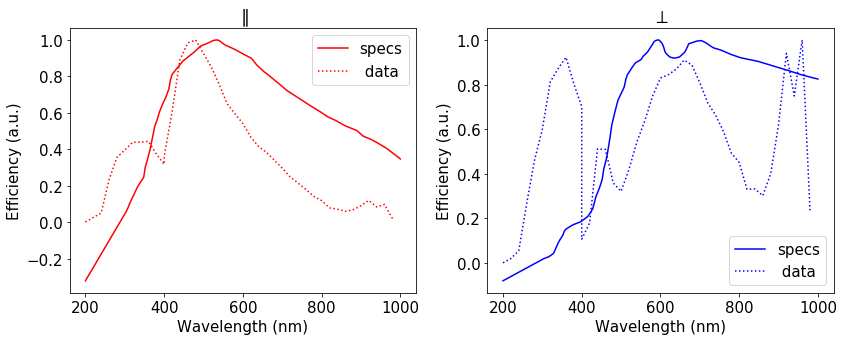

In [9]:
from CCfun import load_grating2_efficiencies

eff00, eff90, effs = load_grating2_efficiencies()
wlr   = np.linspace(200, 1000, 201)
pol00 = means[ 0] / spectral_radiance(wls)
pol90 = means[-1] / spectral_radiance(wls)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(wlr, eff00(wlr) / eff00(wlr).max(), "r-", label="specs")
plt.plot(wls, pol00      / pol00     .max(), "r:", label=" data")

plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Efficiency (a.u.)")
plt.title ("$\parallel$")

plt.subplot(1, 2, 2)
plt.plot(wlr, eff90(wlr) / eff90(wlr).max(), "b-", label="specs")
plt.plot(wls, pol90      / pol90     .max(), "b:", label=" data")

plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Efficiency (a.u.)")
plt.title ("$\perp$")

plt.tight_layout()

# Wavelength dependence of the power

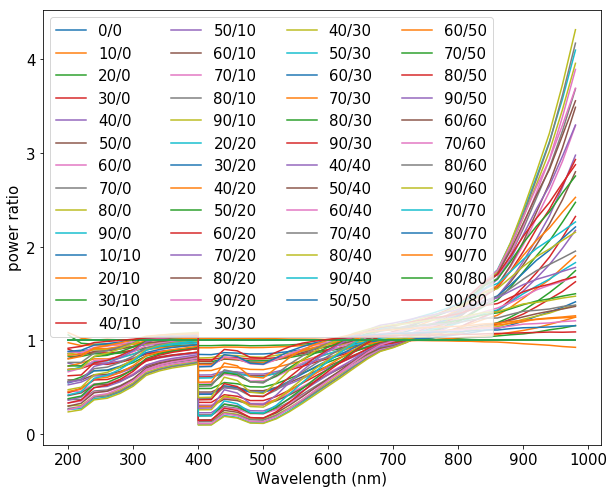

In [10]:
for i, mean0 in enumerate(means[:-1]):
    for j, mean1 in enumerate(means[i:]):
        ratio = mean1 / mean0
        plt.plot(wls, ratio / ratio.mean(), label=f"{polarizations[i+j]}/{polarizations[i]}")

plt.legend(ncol=4)
plt.xlabel("Wavelength (nm)")
plt.ylabel("power ratio");

# Polarization dependence of the power


Power variation  : (0.052512 ± 0.000002)  mW
Power baseline   : (0.063 ± 0.000)  mW
Maxmimum power at: (111.170 ± 0.003) deg



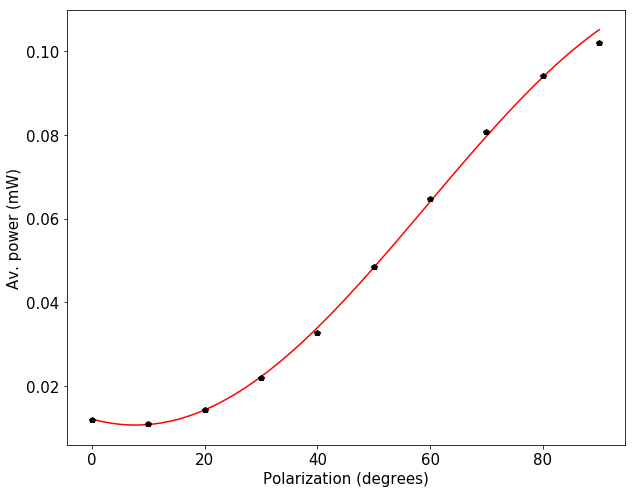

In [11]:
m = means[:, -1]
s = stds [:, -1] / 10

b = m.mean()
d = (m.max() - m.min()) / 2
t = polarizations[np.argmax(m)]

low  =   0, 0e+0,   0,   0
seed =   d, 2e-2,   t,   b
upp  = 2*d, 1e+1, 180, 2*b
f    = fit(cos, polarizations, m, seed, sigma=s, bounds=(low, upp), maxfev=10000)

max_deg   = f.values[2]
max_deg_u = f.errors[2]

print(f"""
Power variation  : ({f.values[0]:.6f} ± {f.errors[0]:.6f})  mW
Power baseline   : ({f.values[3]:.3f} ± {f.errors[3]:.3f})  mW
Maxmimum power at: ({f.values[2]:.3f} ± {f.errors[2]:.3f}) deg
""")

plt.errorbar(polarizations, m, s / 10, fmt="kp")
plt.plot(pol_range, f.fn(pol_range), "r-")
plt.xlabel("Polarization (degrees)")
plt.ylabel("Av. power (mW)");

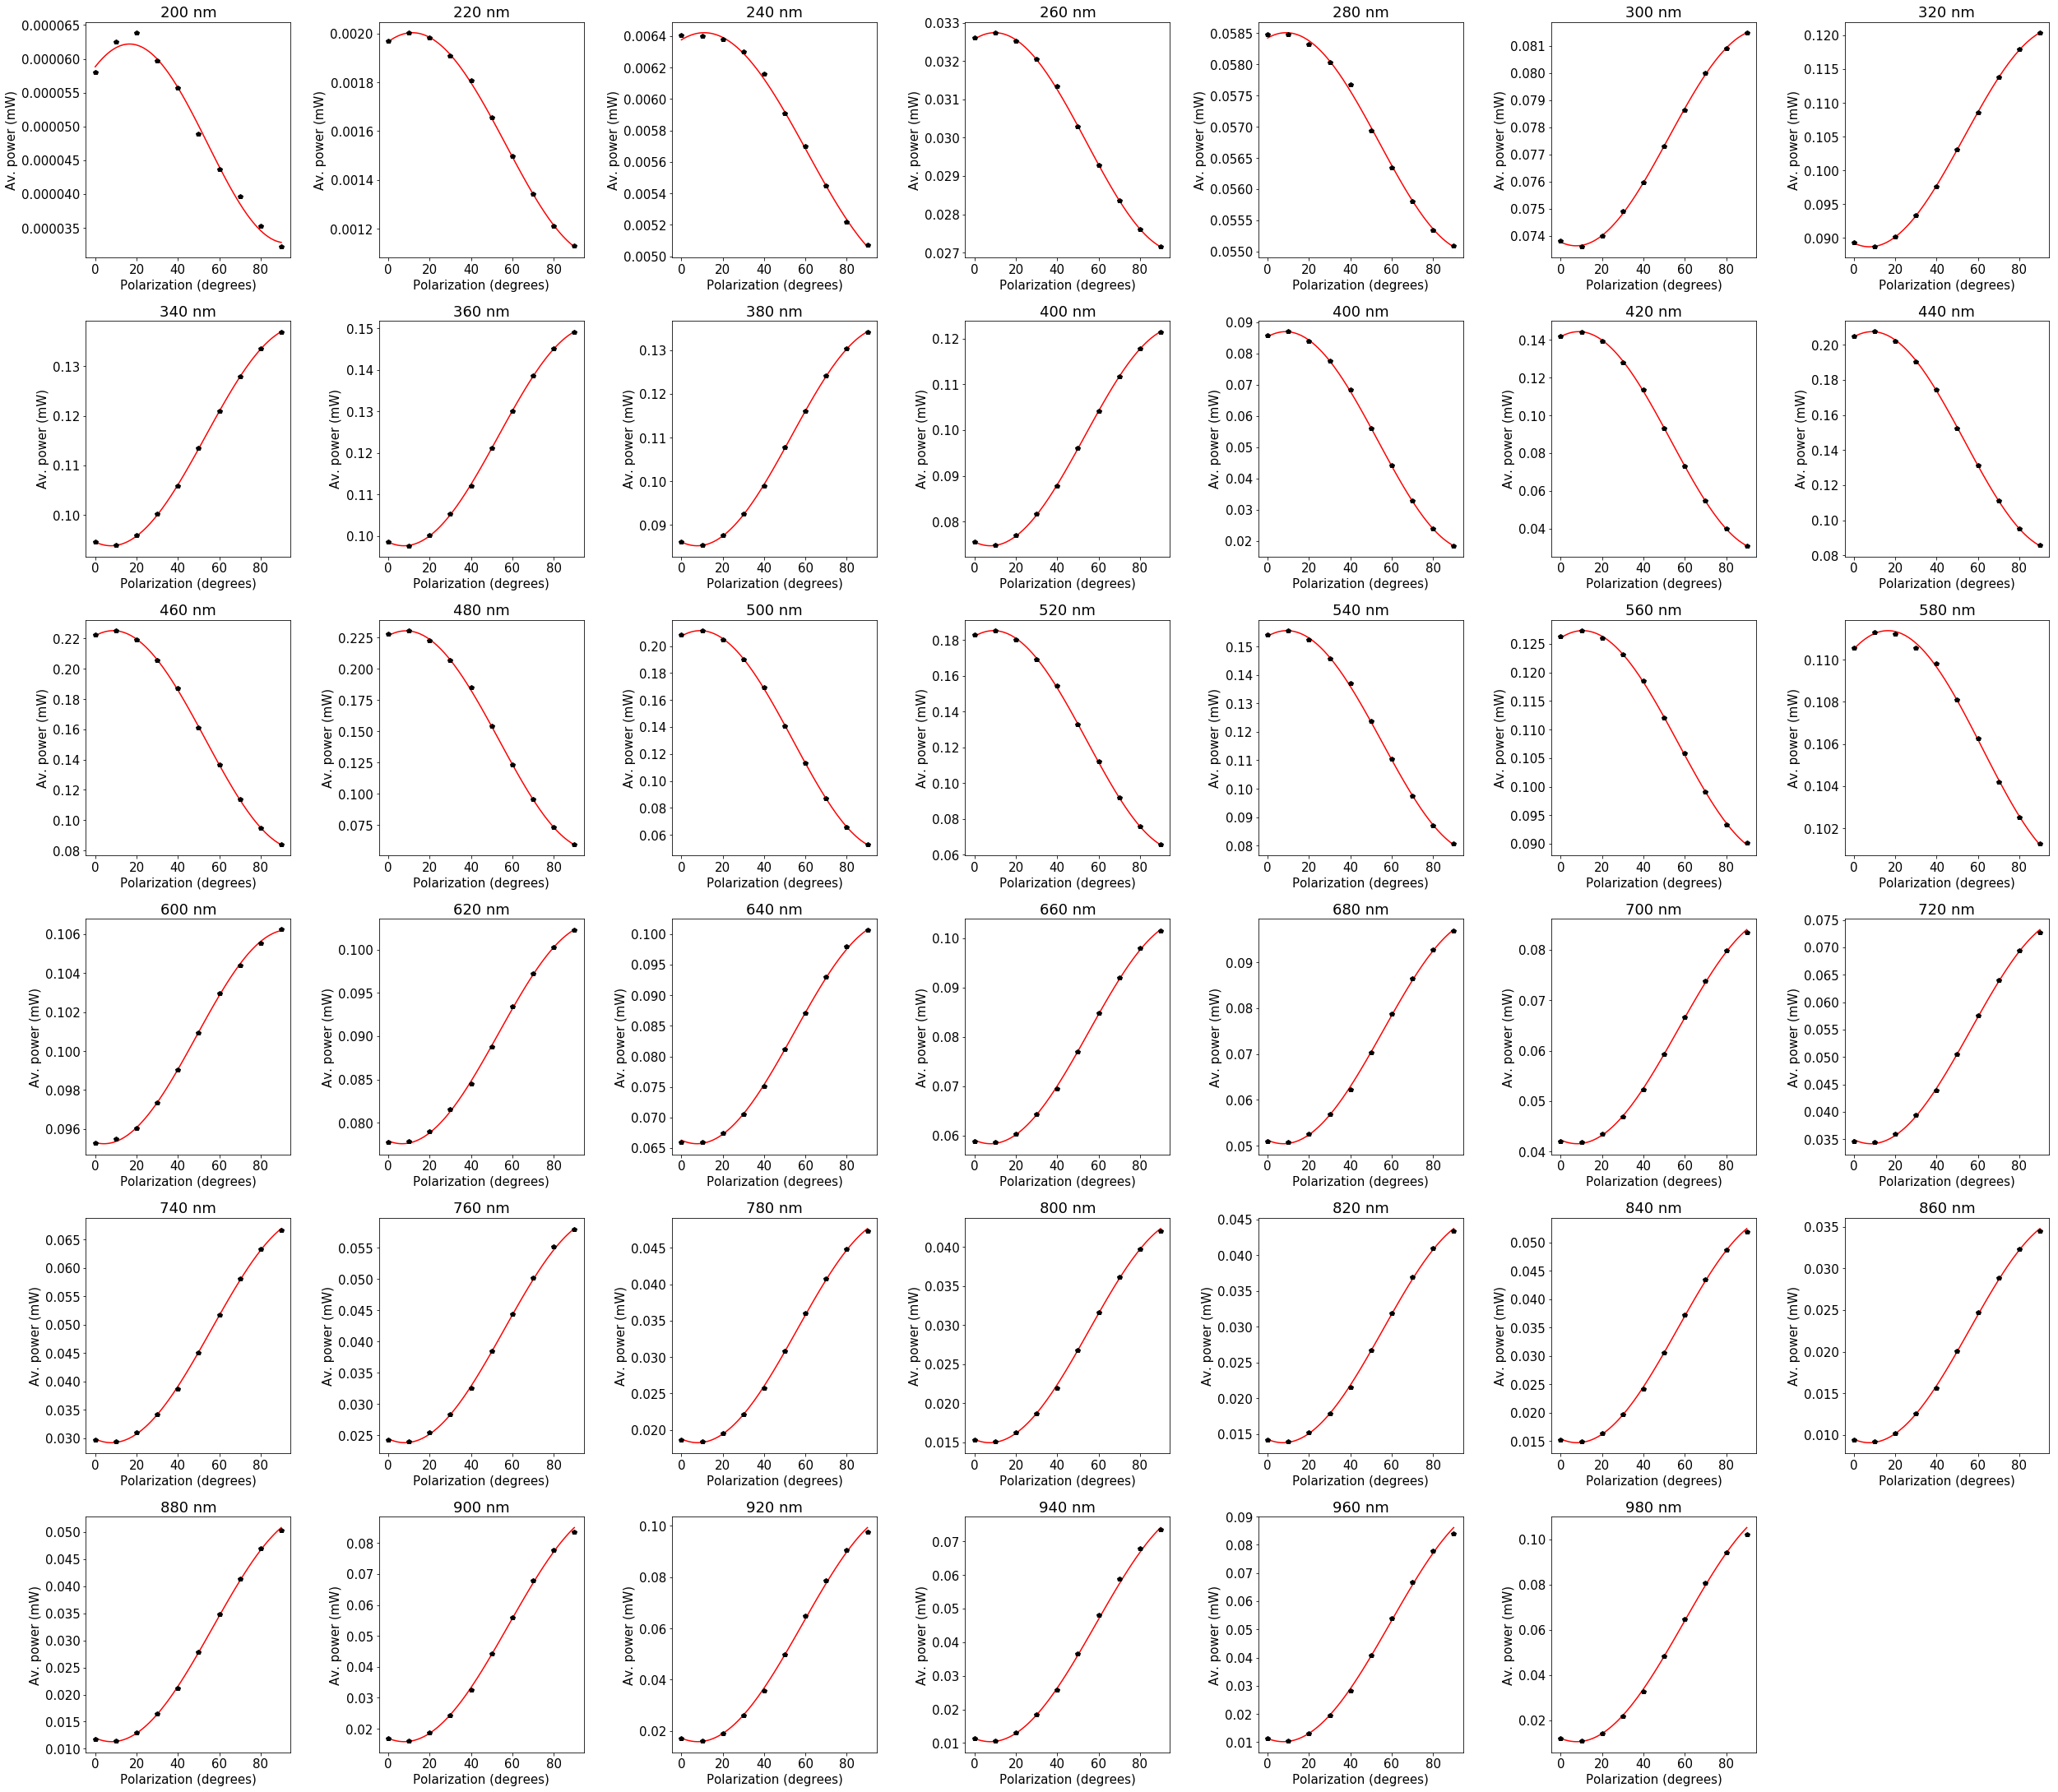

In [12]:
plt.figure(figsize=(35, 35))

delta_p      = []
baseline_p   = []
pol_max_p    = []
delta_p_u    = []
baseline_p_u = []
pol_max_p_u  = []

for i, wl in enumerate(wls):
    m = means[:, i]
    s = stds [:, i] / 10

    b = m.mean()
    d = (m.max() - m.min()) / 2
    t = polarizations[np.argmax(m)]

    low  =   0, 0e+0,   0,   0
    seed =   d, 2e-2,   t,   b
    upp  = 2*d, 1e+1, 180, 2*b
    f    = fit(cos, polarizations, m, seed, sigma=s, bounds=(low, upp), maxfev=10000)

    max_deg   = f.values[2]
    max_deg_u = f.errors[2]

    delta_p      = np.append(delta_p     , f.values[0])
    delta_p_u    = np.append(delta_p_u   , f.errors[0])
    pol_max_p    = np.append(pol_max_p   , f.values[2])
    pol_max_p_u  = np.append(pol_max_p_u , f.errors[2])
    baseline_p   = np.append(baseline_p  , f.values[3])
    baseline_p_u = np.append(baseline_p_u, f.errors[3])

    plt.subplot(7, 7, i + 1)
    plt.errorbar(polarizations, m, s / 10, fmt="kp")
    plt.plot(pol_range, f.fn(pol_range), "r-")
    plt.xlabel("Polarization (degrees)")
    plt.ylabel("Av. power (mW)")
    plt.title (f"{wl} nm")
    
plt.tight_layout()

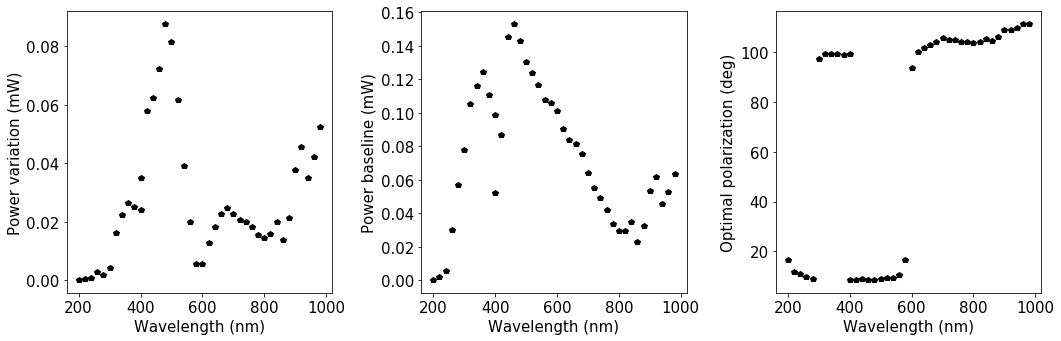

In [13]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.errorbar(wls, delta_p, delta_p_u, fmt="kp")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Power variation (mW)")

plt.subplot(1, 3, 2)
plt.errorbar(wls, baseline_p, baseline_p_u, fmt="kp")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Power baseline (mW)")

plt.subplot(1, 3, 3)
plt.errorbar(wls, pol_max_p, pol_max_p_u, fmt="kp")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Optimal polarization (deg)")

plt.tight_layout()

# Global plot

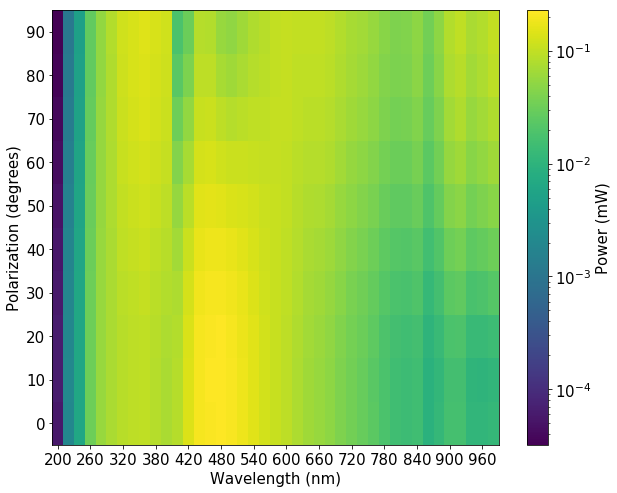

In [14]:
plt.imshow(means, norm=LogNorm(), aspect="auto", origin="lower")
plt.colorbar().set_label("Power (mW)")
plt.xticks(np.arange(0, wls.size, 3), wls[::3])
plt.yticks(np.arange(polarizations.size), polarizations)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Polarization (degrees)");

# Correlate power at sample site with power at regular site

In [15]:
filenames_sample  = sorted(glob.glob(os.path.join(path, "*sample*pol*.txt")))
filenames_regular = sorted(glob.glob(os.path.join(path, "*split*pol*.txt")))

polarizations            = np.arange  (0, 100, 10)
pol_range                = np.linspace(0, 90, 101)
wls, means_sample , stds_sample , ratios_sample  = load_pwr_files(filenames_sample )
___, means_regular, stds_regular, ratios_regular = load_pwr_files(filenames_regular)

Text(0, 0.5, 'Av. power at sample site')

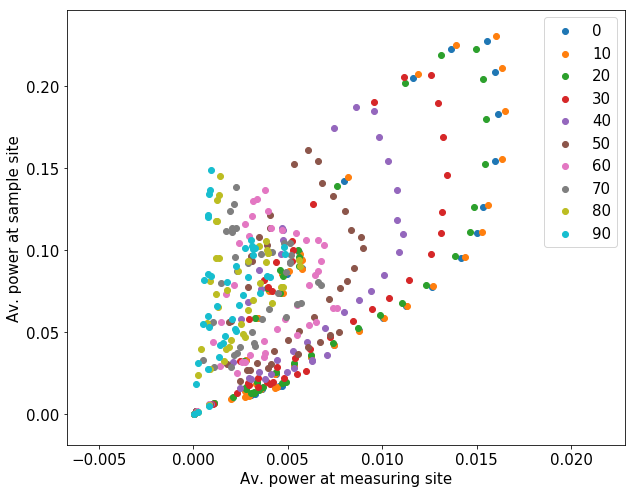

In [16]:
for pol, m_s, m_r in zip(polarizations, means_sample, means_regular):
    plt.scatter(m_r, m_s, label=str(pol))
    f  = fit(polynom, m_r, m_s, (0, 1))

plt.legend(ncol=1)
plt.xlabel("Av. power at measuring site")
plt.ylabel("Av. power at sample site")

Text(0, 0.5, 'Power ratio')

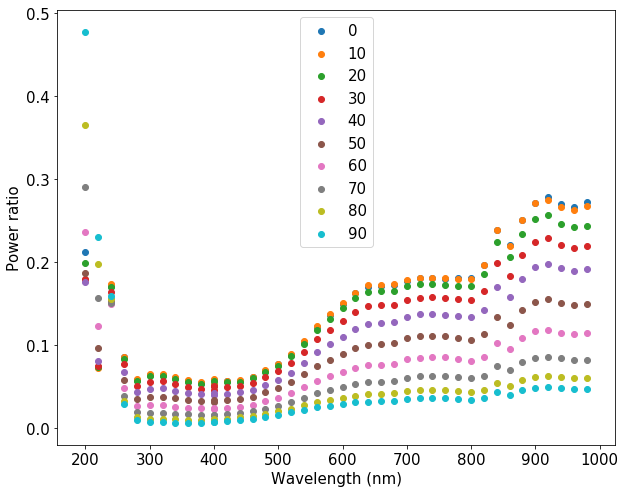

In [17]:
for pol, m_s, m_r in zip(polarizations, means_sample, means_regular):
    plt.scatter(wls, m_r / m_s, label=str(pol))

plt.legend(ncol=1)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Power ratio")

In [22]:
means_regular.shape, means_sample.shape, polarizations.shape, wls.shape

((10, 41), (10, 41), (10,), (41,))

In [28]:
data     = np.concatenate([wls[np.newaxis], means_regular / means_sample], axis=0)
data     = np.concatenate([np.append([-1], polarizations)[:, np.newaxis], data], axis=1)
filename = os.path.join("/Users/Gonzalo/github/CC", "power_ratio.npy")

np.save(filename, data)

In [29]:
data

array([[-1.00000000e+00,  2.00000000e+02,  2.20000000e+02,
         2.40000000e+02,  2.60000000e+02,  2.80000000e+02,
         3.00000000e+02,  3.20000000e+02,  3.40000000e+02,
         3.60000000e+02,  3.80000000e+02,  4.00000000e+02,
         4.00000000e+02,  4.20000000e+02,  4.40000000e+02,
         4.60000000e+02,  4.80000000e+02,  5.00000000e+02,
         5.20000000e+02,  5.40000000e+02,  5.60000000e+02,
         5.80000000e+02,  6.00000000e+02,  6.20000000e+02,
         6.40000000e+02,  6.60000000e+02,  6.80000000e+02,
         7.00000000e+02,  7.20000000e+02,  7.40000000e+02,
         7.60000000e+02,  7.80000000e+02,  8.00000000e+02,
         8.20000000e+02,  8.40000000e+02,  8.60000000e+02,
         8.80000000e+02,  9.00000000e+02,  9.20000000e+02,
         9.40000000e+02,  9.60000000e+02,  9.80000000e+02],
       [ 0.00000000e+00,  2.12307237e-01,  7.34669751e-02,
         1.71157235e-01,  8.50351269e-02,  5.78164590e-02,
         6.38479521e-02,  6.42315271e-02,  6.04724141e-

In [30]:
np.meshgrid(wls, polarizations)

[array([[200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 400, 420,
         440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680,
         700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900, 920, 940,
         960, 980],
        [200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 400, 420,
         440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680,
         700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900, 920, 940,
         960, 980],
        [200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 400, 420,
         440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680,
         700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900, 920, 940,
         960, 980],
        [200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 400, 420,
         440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680,
         700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900, 920, 940,
         960, 980],
        [200, 220, 240, 260, 280

In [32]:
import scipy as scp
import scipy.interpolate

def load_power_ratio(filename="/Users/Gonzalo/github/CC/power_ratio.npy"):
    data = np.load(filename)
    wls  = data[0 , 1:]
    pols = data[1:, 0 ]
    data = data[1:, 1:]
    
    x, y = np.meshgrid(wls, pols)
    return scp.interpolate.interp2d(x, y, data)

pr = load_power_ratio()

/Applications/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=30,17 m=410 fp=0.000115 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


In [33]:
pr(220, 10)

array([0.07197271])

In [ ]:
plt.scatter(wls, means_regular[0] * means_sample[-1] / means_sample[0] / means_regular[-1], label=str(pol))

plt.legend(ncol=1)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Power ratio at 0 / Power ratio at 90")

# Background

In [ ]:
filename_sample  = os.path.join(path, "pwr_measurements_sample_closed.txt")
filename_regular = os.path.join(path, "pwr_measurements_split_closed.txt")

wls, means_sample , stds_sample , ratios_sample  = load_pwr_file(filename_sample )
wls, means_regular, stds_Regular, ratios_regular = load_pwr_file(filename_regular)

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(wls, means_sample )
plt.xlabel("Wavelength (nm)")
plt.ylabel("Av. power (mW)")
plt.title ("Sample site")

plt.subplot(1, 2, 2)
plt.plot(wls, means_regular)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Av. power (mW)")
plt.title ("Regular site")

plt.tight_layout()